In [28]:
%pylab inline
from math import exp
import math

def F_threshold_binary(s):
    y = 0 if s <=0 else 1
    return y

def F_threshold_bipolar(s):
    y = -1 if s<=0 else 1
    return y

def F_sigmoidal_binory(s, param = 1):
    y = 1 / (1+(exp(param * s)))
    return y
    
def F_sigmidal_bipolar(s, param = 1):
    y = (2 / (1+(exp(param * s)))) - 1;
    return y

def F_hiperbolic_tg(s):
    return F_sigmidal_bipolar(s, 2)

def F_linear(s):
    return s

def step_constant_small(_):
    return 0.01

def step_constant_medium(_):
    return 0.1

def step_constant_large(_):
    return 0.5

def step_adaptive(x):
    s = sum(xi**2 for xi in x)
    return 1.0 / (1 + s)

#import math
import matplotlib.pyplot as plt
from random import random, shuffle

def generate_sin_dots(a, b, c, size, step):    
    points = []
    t = 0
    for i in range(size):
        t = t + step
        y = a * math.sin(b * t) + c;
        points.append((t, y))
        
    return points

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [29]:
class perceptrone:
    def __init__(self, inCount):
        self.in_count = inCount
        self.w = []
        self.T = 1;
        self.alf = 0.01
            
    def teach(self, inputs, outputs, Ee):
        self.w = [0.1 for x in range(self.in_count)]
        cur_epoch = 0
        good_epoch = False
        prevE = -1
        while(not good_epoch):
            j = 0
            for cur_input in inputs:
                #alf = step_adaptive(cur_point[0: 1])
                S = 0
                i = 0
                for xi in cur_input:
                    S = S + xi*self.w[i]
                    i = i + 1;
                S = S - self.T
                y = F_linear(S)
                K = y - outputs[j]
                i = 0
                for wi in self.w:
                    wi = wi - (self.alf * cur_input[i] * K)
                    self.w[i] = wi
                    i = i + 1;
                self.T = self.T + (self.alf * K)
                j = j + 1
            Es = 0
            j = 0
            for cur_input in inputs:
                S = 0
                i = 0
                for xi in cur_input:
                    S = S + xi*self.w[i]
                    i = i + 1;
                S = S - self.T
                y = F_linear(S)
                Es = Es + (y - outputs[j])**2
            Es = Es / 2
            print Es
            if (prevE != -1) and (abs(prevE - Es) < Ee):
                good_epoch = True
            prevE = Es
            cur_epoch = cur_epoch + 1
            #if (good_epoch):
            #    break
#             if (cur_epoch > 200):
#                 break
        print (cur_epoch)
        print "w: " , self.w
        print "T: ", self.T
        
    def get_prophecy(self, sample):
        i = 0
        S = 0
        for xi in sample:
            S = S + xi*self.w[i]
            i = i + 1;
        S = S - self.T
        y = F_linear(S)
        return y

22.6744038514
14.9902850343
11.3020859972
9.63431174324
9.01376116404
8.94142105979
9.15145375815
9.49778528841
9.89864273141
10.3081911808
10.7013281035
11.0651569102
11.3940191709
11.6865152085
11.9436836239
12.1678796369
12.3620852974
12.52949081
12.6732473629
12.7963284949
12.9014596946
12.991090263
13.0673906839
13.1322647326
13.187369452
13.2341386843
13.2738075057
13.3074359975
13.3359314821
13.3600687961
13.3805084457
13.3978126615
13.4124594581
13.4248548608
13.4353434778
13.4442176038
36
w:  [-0.6921397168531571, 0.06336931096053136, 0.8360182452805481]
T:  0.000252767618672


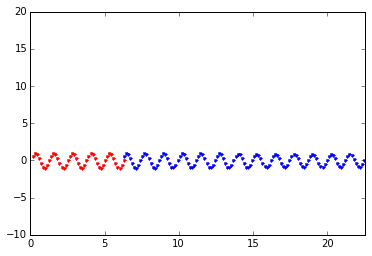

In [30]:
def solve_problem(lenght, steps_count, window_size):
    step_length = lenght / steps_count
    p = generate_sin_dots(1, 5, 0, steps_count, step_length);
    longp = p
    p = p[0: len(p) / 2]
    new_steps_count = len(p)
    p = zip(*p)
    sample_size = new_steps_count - window_size
    sample = []
    answers = []
    for i in range(0, sample_size) :
        sample.append(p[1][i : i + window_size])
        answers.append(p[1][i + window_size])
    prc = perceptrone(len(sample[0]))
    prc.teach(sample, answers, 0.01)
    
    newdots = list(p[1][len(list(p[1])) - window_size : len(list(p[1]))])
    for i in range(0, 300) :
        x = 0.0 + (len(p[1]) + i)*step_length
        y = prc.get_prophecy(newdots[len(newdots) - window_size: len(newdots)])
        plt.plot(x, y, 'b.')
        newdots.append(y)
        

    plt.plot(p[0], p[1], 'r.')
    plt.axis([0, lenght + 10, -10, 20])
    
    plt.show()
     
solve_problem(4*math.pi, 90, 3)